<a href="https://colab.research.google.com/github/noahgift/sugar/blob/master/sugar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sugar

## Sugar and Education

### Data Cleaning

#### CDC 2013 Source

TABLE 3. Crude prevalence* of sugar-sweetened beverage† consumption ≥1 time/day among adults, by employment status, education, and state — Behavioral Risk Factor Surveillance System, 23 states and District of Columbia, 2013

https://www.cdc.gov/mmwr/volumes/65/wr/mm6507a1.htm

In [0]:
import pandas as pd


In [33]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
cdc_2013.head()

Employed      Not employed           Retired  \
State                                                                        
Alaska                26.2 (23.6–28.9)  32.1 (27.8–36.8)  16.0 (12.6–20.2)   
Arizona               33.0 (28.5–37.8)  28.7 (23.5–34.5)  13.8 (10.8–17.5)   
California            22.9 (20.9–25.1)  30.2 (27.1–33.4)  15.0 (12.2–18.2)   
Connecticut           18.9 (17.1–20.9)  24.3 (20.8–28.2)  15.0 (12.7–17.7)   
District of Columbia  18.5 (15.7–21.7)  34.6 (29.5–40.1)  18.5 (15.3–22.1)   

                          <High school       High school      Some college  \
State                                                                        
Alaska                47.1 (37.8–56.5)  34.9 (31.1–38.9)  24.2 (21.0–27.8)   
Arizona               40.4 (30.9–50.7)  36.5 (30.7–42.7)  24.4 (19.9–29.4)   
California            38.5 (34.2–43.0)  29.9 (26.5–33.7)  21.4 (18.8–24.2)   
Connecticut           27.8 (22.4–33.9)  26.9 (23.7–30.3)  19.9 (17.2–23.0)   
District of Columbia  45.6 (36.4–55.2)  39.0 (33.1–45.2)  28.9 (23.4–35.0)   

                      College graduate  
State                                   
Alaska                12.9 (10.5–15.7)  
Arizona               14.6 (11.6–18.3)  
California             11.5 (9.8–13.5)  
Connecticut            10.2 (8.7–12.0)  
District of Columbia    8.4 (7.0–10.1)

In [34]:
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True) 
cdc_2013.head()
  

State  Employed  Not employed  Retired  <High school  \
0                Alaska      26.2          32.1     16.0          47.1   
1               Arizona      33.0          28.7     13.8          40.4   
2            California      22.9          30.2     15.0          38.5   
3           Connecticut      18.9          24.3     15.0          27.8   
4  District of Columbia      18.5          34.6     18.5          45.6   

   High school  Some college  College graduate  
0         34.9          24.2              12.9  
1         36.5          24.4              14.6  
2         29.9          21.4              11.5  
3         26.9          19.9              10.2  
4         39.0          28.9               8.4

In [35]:
cdc_2013.describe()

Employed  Not employed    Retired  <High school  High school  \
count  24.000000     24.000000  24.000000     24.000000    24.000000   
mean   32.325000     35.408333  18.533333     44.662500    37.416667   
std     9.917803      9.056485   5.975142      8.588658     8.243399   
min    16.700000     21.500000   8.900000     27.800000    21.500000   
25%    23.400000     29.750000  14.625000     39.625000    31.925000   
50%    31.550000     32.600000  16.750000     46.350000    36.750000   
75%    42.025000     46.025000  22.550000     51.200000    46.525000   
max    49.700000     49.500000  29.700000     60.000000    50.800000   

       Some college  College graduate  
count     24.000000         24.000000  
mean      30.262500         17.358333  
std        8.490138          6.730264  
min       16.900000          7.800000  
25%       24.200000         12.850000  
50%       28.200000         15.300000  
75%       39.250000         23.500000  
max       47.200000         34.900000

### Education and Sugar


In [6]:
!wget https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
!ls -l

--2019-03-20 23:57:49--  https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87688 (86K) [text/plain]
Saving to: ‘us-states.json.2’

us-states.json.2    100%[===================>]  85.63K  --.-KB/s    in 0.02s   

2019-03-20 23:57:50 (3.39 MB/s) - ‘us-states.json.2’ saved [87688/87688]

total 280
drwxr-xr-x 1 root root  4096 Mar  8 17:26 sample_data
-rw-r--r-- 1 root root 87688 Mar 20 22:43 us-states.json
-rw-r--r-- 1 root root 87688 Mar 20 22:43 us-states.json.1
-rw-r--r-- 1 root root 87688 Mar 20 23:57 us-states.json.2


#### Low Education == High Sugar

In [38]:
import folium
m = folium.Map(location=[36, -102], zoom_start=3)

folium.Choropleth(
    geo_data="us-states.json",
    name='choropleth',
    data=cdc_2013,
    columns=['State', '<High school'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='<High school Education and Grams Sugar Intake Daily'
).add_to(m)

folium.LayerControl().add_to(m)

m

#### College Education Major Decrease in Sugar Intake

In [39]:
import folium
m = folium.Map(location=[36, -102], zoom_start=3)

folium.Choropleth(
    geo_data="us-states.json",
    name='choropleth',
    data=cdc_2003,
    columns=['State', 'College graduate'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='College graduate and Grams Sugar Intake Daily'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Median Daily Sugar Intake by Category

In [14]:
cdc_2003.columns

Index(['State', 'Employed', 'Not employed', 'Retired', '<High school',
       'High school', 'Some college', 'College graduate'],
      dtype='object')

College Graduate

In [15]:
cdc_2003["College graduate"].median()

15.3

In [16]:
cdc_2003["<High school"].median()

46.35

Text(0.5, 1.0, 'CDC 2013: Three Times Higher Sugar Intake College vs High School Grads')

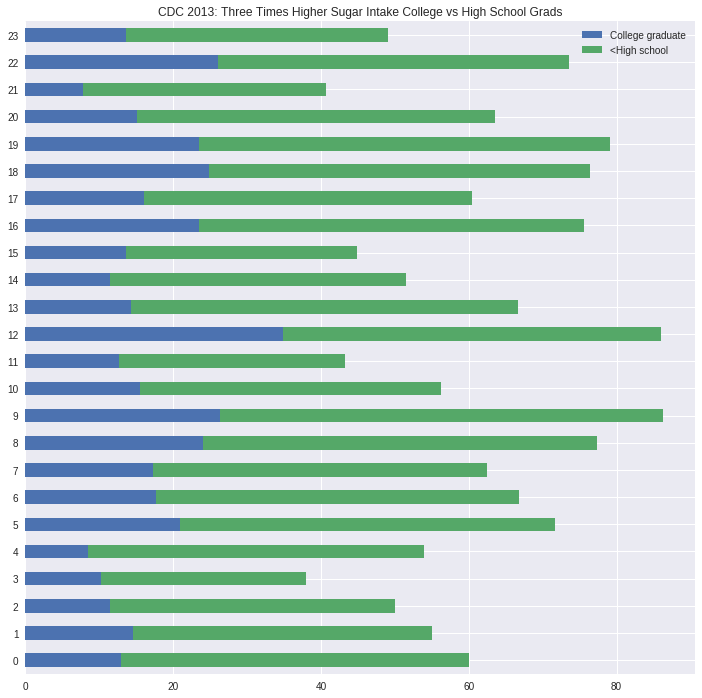

In [32]:
cdc_2003[["State","College graduate", "<High school"]].plot.barh(
    stacked=True, figsize=(12, 12)).set_title("CDC 2013: Three Times Higher Sugar Intake College vs High School Grads")